#### BLM442 Keşif aktivitesi-4: pandas & gorsellestirme

#### İsim/Soyisim: Muhammed Emre Kara
#### Öğrenci Numarası: 160202094
#### E-mail: mailemrek@gmail.com
#### Kullanılan dataset adı:  FIFA 19 complete player dataset
#### Dataset url: https://www.kaggle.com/karangadiya/fifa19

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from bokeh.plotting import figure, output_file, show

data = pd.read_csv('data.csv')

#### Problem 1: En çok tercih edilen 10 forma numarası ve sayıları.

[8.0, 7.0, 10.0, 11.0, 6.0, 5.0, 9.0, 4.0, 20.0, 1.0]
[612, 604, 593, 590, 586, 579, 577, 573, 568, 566]


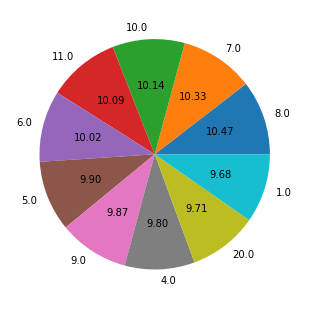

In [2]:
p1 = data.groupby('Jersey_Number').ID.count().sort_values(ascending=False).head(10).to_frame()
df = p1.reset_index()
x=df['Jersey_Number'].tolist()
y=df['ID'].tolist()
print(x)
print(y)
x = np.array(x,dtype=str)
fig1 = plt.figure('1. Problem')
ax = fig1.add_axes([0,0,1,1])
ax.pie(y, labels = x,autopct='%.2f')
plt.show()


#### Problem 2: Kalecilere Özel GKDiving Özelliğinin Kaleci Maaşına Etkisi

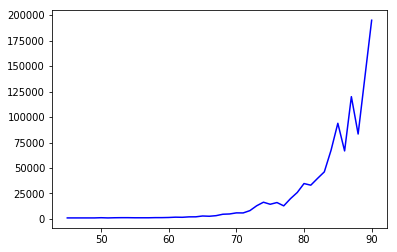

In [3]:
p2 = data[(data.Position == 'GK')].groupby('GKDiving').Number_Wage.mean().to_frame().reset_index()
fig2 = plt.figure()
subplot2 = fig2.add_subplot(1,1,1)
subplot2.plot(p2['GKDiving'].tolist(),p2['Number_Wage'].tolist() , color='b', label='Y')
plt.show()

#### Problem 3: Forvet Oyuncularının Pozisyon ve Tercih Edilen Ayak Dağılımları

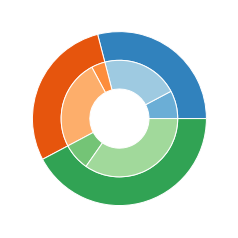

In [4]:
p3 = data[(data.Position == 'CDM') | (data.Position == 'CM') | (data.Position == 'CAM')].groupby(['Position','Preferred_Foot']).ID.count().to_frame().reset_index()

l1 = p3[(p3.Position == 'CAM')].ID.tolist()
l2 = p3[(p3.Position == 'CDM')].ID.tolist()
l3 = p3[(p3.Position == 'CM')].ID.tolist()

fig3 = plt.figure()
ax3 = fig3.subplots()

size = 0.33
vals = np.array([l1, l2, l3])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax3.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax3.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

#### Problem 4: Kalecilere Özel GKHandling Özelliğinin Kaleci Değerine Etkisi (Bokeh dosyası yeni sekmede açılır.)

In [5]:
p4 = data[(data.Position == 'GK')].groupby('GKHandling').Number_Value.mean().to_frame().reset_index()
x = p4['GKHandling'].tolist()
y = p4['Number_Value'].tolist()

p = figure(title="Problem3", x_axis_label='GKHandling', y_axis_label='Number_Value')

p.line(x=x, y=y, line_width=4, line_color="orange", line_dash="4 4")

show(p)


#### Problem 5: 80 güç üstü Sağ ve Sol bek Oyunularının Değer Dağılımı

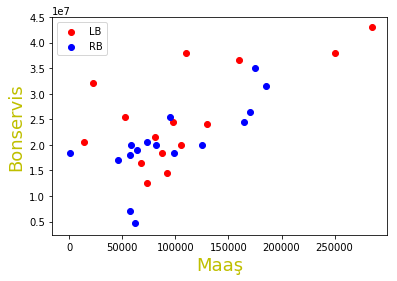

In [6]:
p41 = data[(data.Overall > 80) & (data.Position == 'LB')]
p42 = data[(data.Overall > 80) & (data.Position == 'RB')]
x1= p41['Number_Wage']
y1= p41['Number_Value']
x2= p42['Number_Wage']
y2= p42['Number_Value']
fig5 = plt.figure()
subplot5 = fig5.add_subplot(1,1,1)
subplot5.scatter(x=x1, y=y1, color='r', label='LB')
subplot5.scatter(x=x2, y=y2, color='b', label='RB')
subplot5.legend()
plt.xlabel('Maaş',color='y',size=18)
plt.ylabel('Bonservis',color='y',size=18)
plt.show()

#### Problem 6: Pozisyonlara göre Bonservis Değeri Ortalamaları

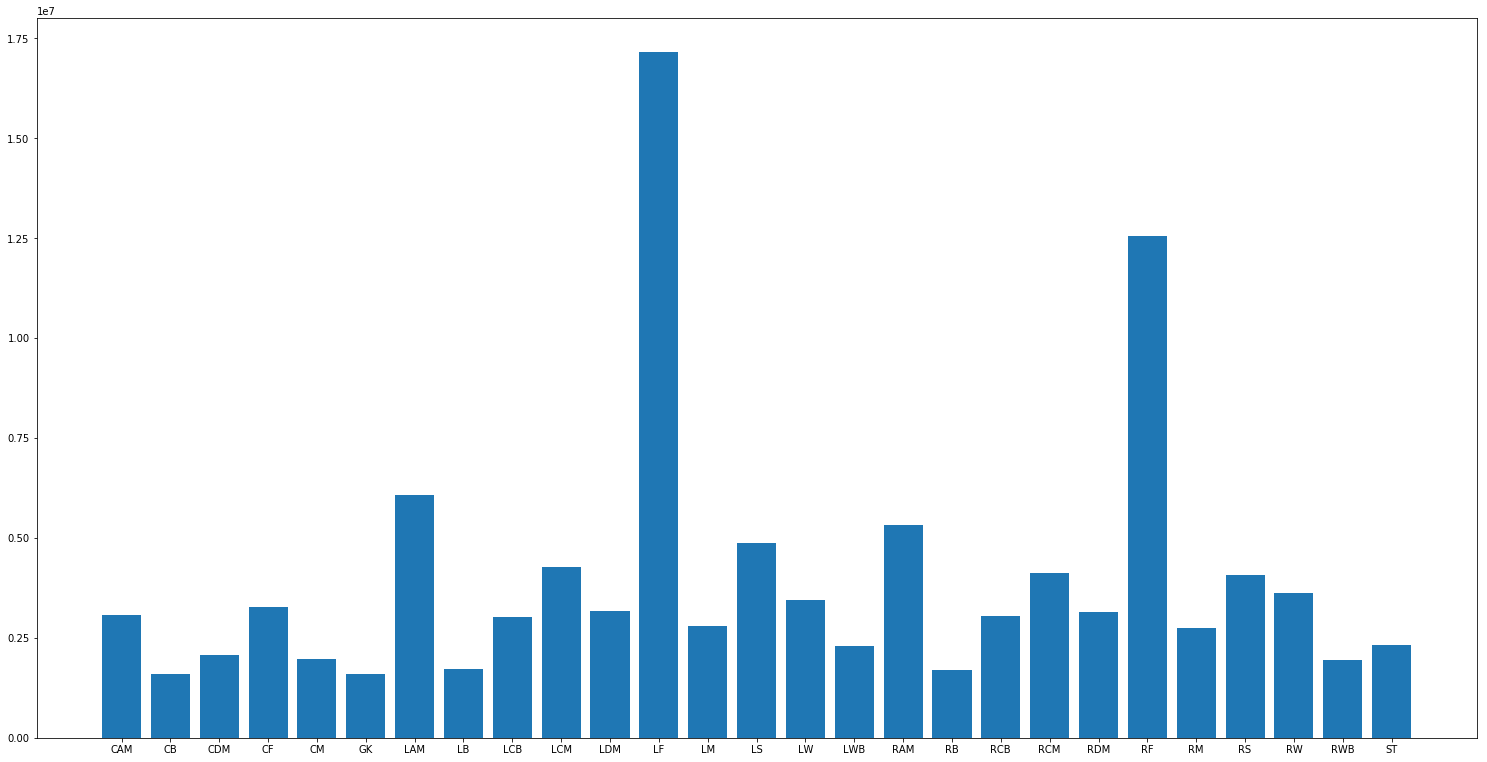

In [7]:
p6 = data.groupby('Position').Number_Value.mean().to_frame().reset_index()
x = p6['Position']
y = p6['Number_Value']
fig6 = plt.figure(figsize=(20,10))
ax6 = fig6.add_axes([0,0,1,1])
ax6.bar(x,y)
plt.show()

#### Problem 7: Kalecilere Özel GKPositioning Özelliğinin Kaleci Maaşına Etkisi

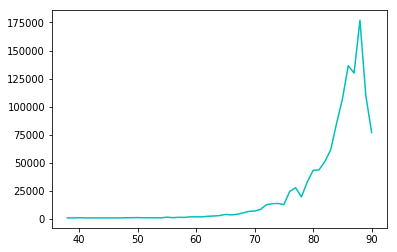

In [8]:
p7 = data[(data.Position == 'GK')].groupby('GKPositioning').Number_Wage.mean().to_frame().reset_index()
fig7 = plt.figure()
subplot7 = fig7.add_subplot(1,1,1)
subplot7.plot(p7['GKPositioning'].tolist(),p7['Number_Wage'].tolist() , color='c', label='Y')

#### Problem 8: Oyuncuların Yaş Ve Potensiyel Yoğunluk Haritası

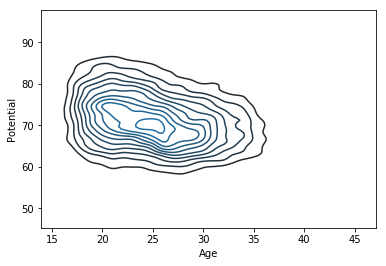

In [9]:
sns.kdeplot(data['Age'], data['Potential'])

#### Problem 9: Pozisyonların Forma Numarası Yoğunluk Dağılımları

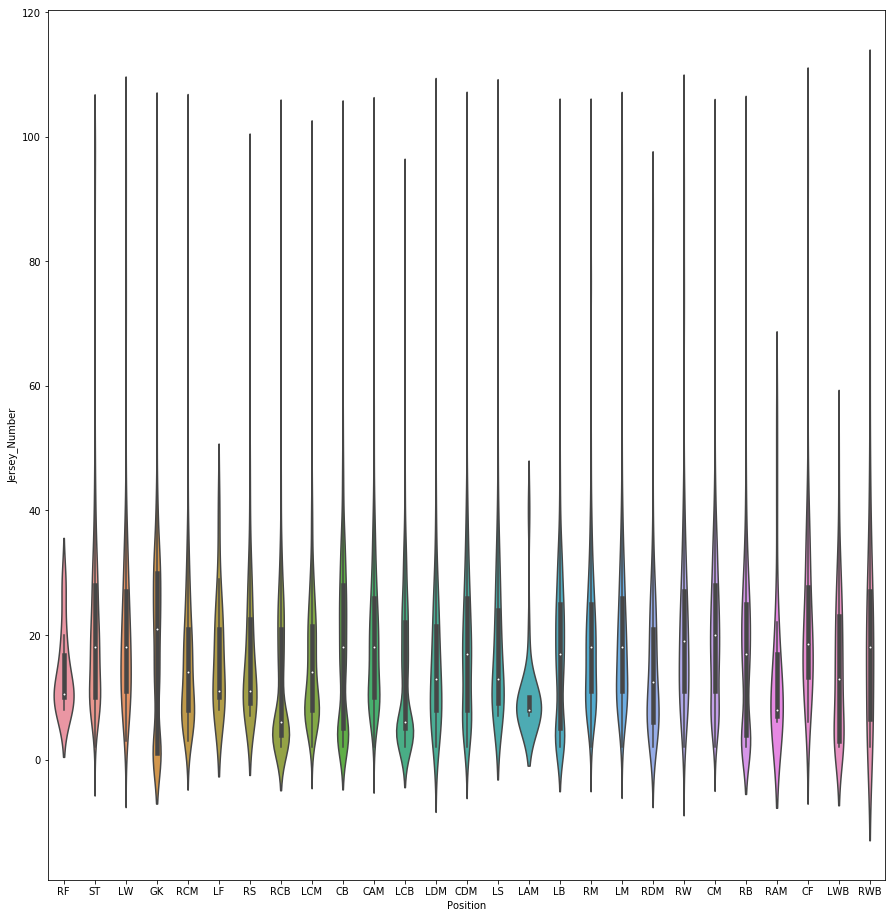

In [10]:
plt.figure(figsize=(15,16))
sns.violinplot(x='Position', y='Jersey_Number', data=data)

#### Problem 10: Kalecilere Özel GKReflexes Özelliğinin Kaleci Değerine Etkisi

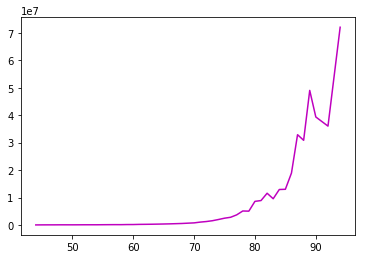

In [11]:
p10 = data[(data.Position == 'GK')].groupby('GKReflexes').Number_Value.mean().to_frame().reset_index()
fig10 = plt.figure()
subplot10 = fig10.add_subplot(1,1,1)
subplot10.plot(p10['GKReflexes'].tolist(),p10['Number_Value'].tolist() , color='m', label='Y')